In [1]:
import pandas as pd

In [2]:
data_path = "C:/Users/Katta's/PycharmProjects/data/usecase3/train.csv"
housing = pd.read_csv(data_path)

In [3]:
 house_obj= housing.select_dtypes(include=['object']).copy()

In [4]:
house_obj.drop(house_obj.columns[house_obj.isnull().any()],axis=1, inplace=True) 

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in house_obj.columns.values:
        le.fit(house_obj[col])
        house_obj[col]=le.transform(house_obj[col])

In [7]:
# All types except object
housing_int = housing.select_dtypes(exclude=['object']).copy()
# housing_cat1 = housing_cat.astype('int64',copy=False)
int_columns = housing_int.columns


In [8]:
from sklearn.preprocessing import StandardScaler
# Scaling training because of variance
ss = StandardScaler()
# scaling training data
housing_cat1_scaled = ss.fit_transform(housing_int)


c:\users\katta's\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\katta's\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
housing_cat1_scaled_df = pd.DataFrame(housing_cat1_scaled, columns=int_columns)

In [10]:
housing_t = pd.concat([house_obj, housing_cat1_scaled_df],axis= 1)


In [11]:
housing_t['GarageYrBlt'].fillna(housing_t['GarageYrBlt'].mean(), inplace=True)
housing_t['MasVnrArea'].fillna(housing_t['MasVnrArea'].mean(), inplace=True)
housing_t['LotFrontage'].fillna(housing_t['LotFrontage'].mean(), inplace=True)

In [12]:
housing_train = housing_t.dropna()
print(housing_train.columns)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition', 'Id', 'MSSubClass', 'LotFrontage',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [13]:
train_x = housing_train.drop(['SalePrice', 'Id'],axis=1)
train_y = housing_train['SalePrice']
train_x.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [64]:
# Early stopping 
from keras.callbacks import EarlyStopping
_es_monitor = 'val_loss'
_es_patience = 10
es = EarlyStopping(monitor=_es_monitor, mode='min', verbose=1, patience=_es_patience)

In [65]:
#define batch size and number of epchos 
_batch_size = 32
_epochs = 500
_mc_model_location = 'v1_model.h5'
_mc_monitor = 'val_loss'
lr = 0.005
# Defining optimizer 
from keras.optimizers import SGD
_opt = SGD(lr)
# _opt = 'adam'
_loss = 'mean_squared_error'

In [66]:
# Model check point
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
mc = ModelCheckpoint(_mc_model_location, monitor=_mc_monitor, mode='max', verbose=1, save_best_only=True)

In [67]:
model.compile(loss=_loss, optimizer=_opt, metrics=['accuracy'])

In [68]:
history = model.fit(train_x.values, train_y.values, validation_split=0.20,
                    epochs=_epochs, batch_size = len(train_x), verbose=1, callbacks=[es,mc])

Train on 1168 samples, validate on 292 samples
Epoch 1/500


1168/1168 [==============================] - 1s 552us/step - loss: 2.2049 - acc: 0.0000e+00 - val_loss: 1.3474 - val_acc: 0.0000e+00



Epoch 00001: val_loss improved from -inf to 1.34743, saving model to v1_model.h5


Epoch 2/500
1168/1168 [==============================] - 0s 7us/step - loss: 1.7898 - acc: 0.0000e+00 - val_loss: 1.0544 - val_acc: 0.0000e+00



Epoch 00002: val_loss did not improve from 1.34743
Epoch 3/500
1168/1168 [==============================] - 0s 7us/step - loss: 1.5074 - acc: 0.0000e+00 - val_loss: 0.9963 - val_acc: 0.0000e+00



Epoch 00003: val_loss did not improve from 1.34743
Epoch 4/500
1168/1168 [==============================] - 0s 9us/step - loss: 1.1985 - acc: 0.0000e+00 - val_loss: 0.9713 - val_acc: 0.0000e+00



Epoch 00004: val_loss did not improve from 1.34743
Epoch 5/500
1168/1168 [==============================] - 0s 9us/step - loss: 1.1817 - acc: 0.0000e+00 - val_loss: 0.9517 - val_acc: 0.0000e+00



Epoch 00005: val_loss did not improve from 1.34743
Epoch 6/500
1168/1168 [==============================] - 0s 12us/step - loss: 1.0922 - acc: 0.0000e+00 - val_loss: 0.9351 - val_acc: 0.0000e+00



Epoch 00006: val_loss did not improve from 1.34743
Epoch 7/500
1168/1168 [==============================] - 0s 15us/step - loss: 1.0212 - acc: 0.0000e+00 - val_loss: 0.9205 - val_acc: 0.0000e+00



Epoch 00007: val_loss did not improve from 1.34743
Epoch 8/500
1168/1168 [==============================] - 0s 10us/step - loss: 1.0027 - acc: 0.0000e+00 - val_loss: 0.9076 - val_acc: 0.0000e+00



Epoch 00008: val_loss did not improve from 1.34743
Epoch 9/500
1168/1168 [==============================] - 0s 12us/step - loss: 0.9801 - acc: 0.0000e+00 - val_loss: 0.8969 - val_acc: 0.0000e+00



Epoch 00009: val_loss did not improve from 1.34743
Epoch 10/500
1168/1168 [==============================] - 0s 14us/step - loss: 0.9866 - acc: 0.0000e+00 - val_loss: 0.8861 - val_acc: 0.0000e+00



Epoch 00010: val_loss did not improve from 1.34743
Epoch 11/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.9813 - acc: 0.0000e+00 - val_loss: 0.8755 - val_acc: 0.0000e+00



Epoch 00011: val_loss did not improve from 1.34743
Epoch 12/500
1168/1168 [==============================] - 0s 11us/step - loss: 0.9126 - acc: 0.0000e+00 - val_loss: 0.8671 - val_acc: 0.0000e+00



Epoch 00012: val_loss did not improve from 1.34743
Epoch 13/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.9204 - acc: 0.0000e+00 - val_loss: 0.8573 - val_acc: 0.0000e+00



Epoch 00013: val_loss did not improve from 1.34743
Epoch 14/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.9428 - acc: 0.0000e+00 - val_loss: 0.8477 - val_acc: 0.0000e+00



Epoch 00014: val_loss did not improve from 1.34743
Epoch 15/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.9004 - acc: 0.0000e+00 - val_loss: 0.8379 - val_acc: 0.0000e+00



Epoch 00015: val_loss did not improve from 1.34743
Epoch 16/500
1168/1168 [==============================] - 0s 10us/step - loss: 0.9016 - acc: 0.0000e+00 - val_loss: 0.8322 - val_acc: 0.0000e+00



Epoch 00016: val_loss did not improve from 1.34743
Epoch 17/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.8828 - acc: 0.0000e+00 - val_loss: 0.8213 - val_acc: 0.0000e+00



Epoch 00017: val_loss did not improve from 1.34743
Epoch 18/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.8528 - acc: 0.0000e+00 - val_loss: 0.8135 - val_acc: 0.0000e+00



Epoch 00018: val_loss did not improve from 1.34743
Epoch 19/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.8691 - acc: 0.0000e+00 - val_loss: 0.8062 - val_acc: 0.0000e+00



Epoch 00019: val_loss did not improve from 1.34743
Epoch 20/500


1168/1168 [==============================] - 0s 18us/step - loss: 0.8183 - acc: 0.0000e+00 - val_loss: 0.7970 - val_acc: 0.0000e+00



Epoch 00020: val_loss did not improve from 1.34743
Epoch 21/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.8168 - acc: 0.0000e+00 - val_loss: 0.7856 - val_acc: 0.0000e+00



Epoch 00021: val_loss did not improve from 1.34743
Epoch 22/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.7902 - acc: 0.0000e+00 - val_loss: 0.7712 - val_acc: 0.0000e+00



Epoch 00022: val_loss did not improve from 1.34743
Epoch 23/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.8216 - acc: 0.0000e+00 - val_loss: 0.7600 - val_acc: 0.0000e+00



Epoch 00023: val_loss did not improve from 1.34743
Epoch 24/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.8021 - acc: 0.0000e+00 - val_loss: 0.7458 - val_acc: 0.0000e+00



Epoch 00024: val_loss did not improve from 1.34743
Epoch 25/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.7992 - acc: 0.0000e+00 - val_loss: 0.7388 - val_acc: 0.0000e+00



Epoch 00025: val_loss did not improve from 1.34743
Epoch 26/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.7686 - acc: 0.0000e+00 - val_loss: 0.7202 - val_acc: 0.0000e+00



Epoch 00026: val_loss did not improve from 1.34743
Epoch 27/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.7544 - acc: 0.0000e+00 - val_loss: 0.7080 - val_acc: 0.0000e+00



Epoch 00027: val_loss did not improve from 1.34743
Epoch 28/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.7749 - acc: 0.0000e+00 - val_loss: 0.7000 - val_acc: 0.0000e+00



Epoch 00028: val_loss did not improve from 1.34743
Epoch 29/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.7574 - acc: 0.0000e+00 - val_loss: 0.6826 - val_acc: 0.0000e+00



Epoch 00029: val_loss did not improve from 1.34743
Epoch 30/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.7239 - acc: 0.0000e+00 - val_loss: 0.6677 - val_acc: 0.0000e+00



Epoch 00030: val_loss did not improve from 1.34743
Epoch 31/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.7069 - acc: 0.0000e+00 - val_loss: 0.6575 - val_acc: 0.0000e+00



Epoch 00031: val_loss did not improve from 1.34743
Epoch 32/500


1168/1168 [==============================] - 0s 16us/step - loss: 0.6719 - acc: 0.0000e+00 - val_loss: 0.6457 - val_acc: 0.0000e+00



Epoch 00032: val_loss did not improve from 1.34743
Epoch 33/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.6704 - acc: 0.0000e+00 - val_loss: 0.6358 - val_acc: 0.0000e+00



Epoch 00033: val_loss did not improve from 1.34743
Epoch 34/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.6867 - acc: 0.0000e+00 - val_loss: 0.6243 - val_acc: 0.0000e+00



Epoch 00034: val_loss did not improve from 1.34743
Epoch 35/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.6559 - acc: 0.0000e+00 - val_loss: 0.6127 - val_acc: 0.0000e+00



Epoch 00035: val_loss did not improve from 1.34743
Epoch 36/500
1168/1168 [==============================]

 - 0s 9us/step - loss: 0.6751 - acc: 0.0000e+00 - val_loss: 0.5981 - val_acc: 0.0000e+00



Epoch 00036: val_loss did not improve from 1.34743
Epoch 37/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.6630 - acc: 0.0000e+00 - val_loss: 0.5938 - val_acc: 0.0000e+00



Epoch 00037: val_loss did not improve from 1.34743
Epoch 38/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.6744 - acc: 0.0000e+00 - val_loss: 0.5886 - val_acc: 0.0000e+00



Epoch 00038: val_loss did not improve from 1.34743
Epoch 39/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.6577 - acc: 0.0000e+00 - val_loss: 0.5829 - val_acc: 0.0000e+00



Epoch 00039: val_loss did not improve from 1.34743
Epoch 40/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.6191 - acc: 0.0000e+00 - val_loss: 0.5739 - val_acc: 0.0000e+00



Epoch 00040: val_loss did not improve from 1.34743
Epoch 41/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.6345 - acc: 0.0000e+00 - val_loss: 0.5663 - val_acc: 0.0000e+00



Epoch 00041: val_loss did not improve from 1.34743
Epoch 42/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.6244 - acc: 0.0000e+00 - val_loss: 0.5645 - val_acc: 0.0000e+00



Epoch 00042: val_loss did not improve from 1.34743
Epoch 43/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.5755 - acc: 0.0000e+00 - val_loss: 0.5480 - val_acc: 0.0000e+00



Epoch 00043: val_loss did not improve from 1.34743
Epoch 44/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.5767 - acc: 0.0000e+00 - val_loss: 0.5416 - val_acc: 0.0000e+00



Epoch 00044: val_loss did not improve from 1.34743
Epoch 45/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.5965 - acc: 0.0000e+00 - val_loss: 0.5375 - val_acc: 0.0000e+00



Epoch 00045: val_loss did not improve from 1.34743
Epoch 46/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.5761 - acc: 0.0000e+00 - val_loss: 0.5323 - val_acc: 0.0000e+00



Epoch 00046: val_loss did not improve from 1.34743
Epoch 47/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.6041 - acc: 0.0000e+00 - val_loss: 0.5282 - val_acc: 0.0000e+00



Epoch 00047: val_loss did not improve from 1.34743
Epoch 48/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.5638 - acc: 0.0000e+00 - val_loss: 0.5213 - val_acc: 0.0000e+00



Epoch 00048: val_loss did not improve from 1.34743
Epoch 49/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.5082 - acc: 0.0000e+00 - val_loss: 0.5114 - val_acc: 0.0000e+00



Epoch 00049: val_loss did not improve from 1.34743
Epoch 50/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.5150 - acc: 0.0000e+00 - val_loss: 0.5013 - val_acc: 0.0000e+00



Epoch 00050: val_loss did not improve from 1.34743
Epoch 51/500


1168/1168 [==============================] - 0s 11us/step - loss: 0.5605 - acc: 0.0000e+00 - val_loss: 0.4985 - val_acc: 0.0000e+00



Epoch 00051: val_loss did not improve from 1.34743
Epoch 52/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.5141 - acc: 0.0000e+00 - val_loss: 0.4941 - val_acc: 0.0000e+00



Epoch 00052: val_loss did not improve from 1.34743
Epoch 53/500


1168/1168 [==============================] - 0s 11us/step - loss: 0.5134 - acc: 0.0000e+00 - val_loss: 0.4819 - val_acc: 0.0000e+00



Epoch 00053: val_loss did not improve from 1.34743
Epoch 54/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.5397 - acc: 0.0000e+00 - val_loss: 0.4749 - val_acc: 0.0000e+00



Epoch 00054: val_loss did not improve from 1.34743
Epoch 55/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.5006 - acc: 0.0000e+00 - val_loss: 0.4701 - val_acc: 0.0000e+00



Epoch 00055: val_loss did not improve from 1.34743
Epoch 56/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4959 - acc: 0.0000e+00 - val_loss: 0.4728 - val_acc: 0.0000e+00



Epoch 00056: val_loss did not improve from 1.34743
Epoch 57/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.4959 - acc: 0.0000e+00 - val_loss: 0.4642 - val_acc: 0.0000e+00



Epoch 00057: val_loss did not improve from 1.34743
Epoch 58/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.4887 - acc: 0.0000e+00 - val_loss: 0.4602 - val_acc: 0.0000e+00



Epoch 00058: val_loss did not improve from 1.34743
Epoch 59/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.4879 - acc: 0.0000e+00 - val_loss: 0.4554 - val_acc: 0.0000e+00



Epoch 00059: val_loss did not improve from 1.34743
Epoch 60/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.5096 - acc: 0.0000e+00 - val_loss: 0.4520 - val_acc: 0.0000e+00



Epoch 00060: val_loss did not improve from 1.34743
Epoch 61/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.5031 - acc: 0.0000e+00 - val_loss: 0.4515 - val_acc: 0.0000e+00



Epoch 00061: val_loss did not improve from 1.34743
Epoch 62/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.4865 - acc: 0.0000e+00 - val_loss: 0.4467 - val_acc: 0.0000e+00



Epoch 00062: val_loss did not improve from 1.34743
Epoch 63/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4997 - acc: 0.0000e+00 - val_loss: 0.4437 - val_acc: 0.0000e+00



Epoch 00063: val_loss did not improve from 1.34743
Epoch 64/500


1168/1168 [==============================] - 0s 11us/step - loss: 0.4737 - acc: 0.0000e+00 - val_loss: 0.4364 - val_acc: 0.0000e+00



Epoch 00064: val_loss did not improve from 1.34743
Epoch 65/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4649 - acc: 0.0000e+00 - val_loss: 0.4389 - val_acc: 0.0000e+00



Epoch 00065: val_loss did not improve from 1.34743
Epoch 66/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4806 - acc: 0.0000e+00 - val_loss: 0.4332 - val_acc: 0.0000e+00



Epoch 00066: val_loss did not improve from 1.34743
Epoch 67/500
1168/1168 [==============================]

 - 0s 9us/step - loss: 0.4911 - acc: 0.0000e+00 - val_loss: 0.4320 - val_acc: 0.0000e+00



Epoch 00067: val_loss did not improve from 1.34743
Epoch 68/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.4552 - acc: 0.0000e+00 - val_loss: 0.4271 - val_acc: 0.0000e+00



Epoch 00068: val_loss did not improve from 1.34743
Epoch 69/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.4474 - acc: 0.0000e+00 - val_loss: 0.4237 - val_acc: 0.0000e+00



Epoch 00069: val_loss did not improve from 1.34743
Epoch 70/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4305 - acc: 0.0000e+00 - val_loss: 0.4188 - val_acc: 0.0000e+00



Epoch 00070: val_loss did not improve from 1.34743
Epoch 71/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4108 - acc: 0.0000e+00 - val_loss: 0.4161 - val_acc: 0.0000e+00



Epoch 00071: val_loss did not improve from 1.34743
Epoch 72/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.4399 - acc: 0.0000e+00 - val_loss: 0.4166 - val_acc: 0.0000e+00



Epoch 00072: val_loss did not improve from 1.34743
Epoch 73/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.4355 - acc: 0.0000e+00 - val_loss: 0.4166 - val_acc: 0.0000e+00



Epoch 00073: val_loss did not improve from 1.34743
Epoch 74/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.4161 - acc: 0.0000e+00 - val_loss: 0.4131 - val_acc: 0.0000e+00



Epoch 00074: val_loss did not improve from 1.34743
Epoch 75/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4035 - acc: 0.0000e+00 - val_loss: 0.4133 - val_acc: 0.0000e+00



Epoch 00075: val_loss did not improve from 1.34743
Epoch 76/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.4282 - acc: 0.0000e+00 - val_loss: 0.4096 - val_acc: 0.0000e+00



Epoch 00076: val_loss did not improve from 1.34743
Epoch 77/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.3904 - acc: 0.0000e+00 - val_loss: 0.4063 - val_acc: 0.0000e+00



Epoch 00077: val_loss did not improve from 1.34743
Epoch 78/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.4286 - acc: 0.0000e+00 - val_loss: 0.4062 - val_acc: 0.0000e+00



Epoch 00078: val_loss did not improve from 1.34743
Epoch 79/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3837 - acc: 0.0000e+00 - val_loss: 0.4023 - val_acc: 0.0000e+00



Epoch 00079: val_loss did not improve from 1.34743
Epoch 80/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.4106 - acc: 0.0000e+00 - val_loss: 0.4018 - val_acc: 0.0000e+00



Epoch 00080: val_loss did not improve from 1.34743
Epoch 81/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.4167 - acc: 0.0000e+00 - val_loss: 0.4016 - val_acc: 0.0000e+00



Epoch 00081: val_loss did not improve from 1.34743
Epoch 82/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3918 - acc: 0.0000e+00 - val_loss: 0.3996 - val_acc: 0.0000e+00



Epoch 00082: val_loss did not improve from 1.34743
Epoch 83/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4049 - acc: 0.0000e+00 - val_loss: 0.3955 - val_acc: 0.0000e+00



Epoch 00083: val_loss did not improve from 1.34743
Epoch 84/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3915 - acc: 0.0000e+00 - val_loss: 0.3975 - val_acc: 0.0000e+00



Epoch 00084: val_loss did not improve from 1.34743
Epoch 85/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.3904 - acc: 0.0000e+00 - val_loss: 0.3931 - val_acc: 0.0000e+00



Epoch 00085: val_loss did not improve from 1.34743
Epoch 86/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.4051 - acc: 0.0000e+00 - val_loss: 0.3938 - val_acc: 0.0000e+00



Epoch 00086: val_loss did not improve from 1.34743
Epoch 87/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3716 - acc: 0.0000e+00 - val_loss: 0.3935 - val_acc: 0.0000e+00



Epoch 00087: val_loss did not improve from 1.34743
Epoch 88/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3563 - acc: 0.0000e+00 - val_loss: 0.3864 - val_acc: 0.0000e+00



Epoch 00088: val_loss did not improve from 1.34743
Epoch 89/500
1168/1168 [==============================] - 0s 7us/step - loss: 0.4065 - acc: 0.0000e+00 - val_loss: 0.3832 - val_acc: 0.0000e+00



Epoch 00089: val_loss did not improve from 1.34743
Epoch 90/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3897 - acc: 0.0000e+00 - val_loss: 0.3857 - val_acc: 0.0000e+00



Epoch 00090: val_loss did not improve from 1.34743
Epoch 91/500


1168/1168 [==============================] - 0s 13us/step - loss: 0.4145 - acc: 0.0000e+00 - val_loss: 0.3856 - val_acc: 0.0000e+00



Epoch 00091: val_loss did not improve from 1.34743
Epoch 92/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3683 - acc: 0.0000e+00 - val_loss: 0.3845 - val_acc: 0.0000e+00



Epoch 00092: val_loss did not improve from 1.34743
Epoch 93/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.3585 - acc: 0.0000e+00 - val_loss: 0.3807 - val_acc: 0.0000e+00



Epoch 00093: val_loss did not improve from 1.34743
Epoch 94/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3647 - acc: 0.0000e+00 - val_loss: 0.3796 - val_acc: 0.0000e+00



Epoch 00094: val_loss did not improve from 1.34743
Epoch 95/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3981 - acc: 0.0000e+00 - val_loss: 0.3789 - val_acc: 0.0000e+00



Epoch 00095: val_loss did not improve from 1.34743
Epoch 96/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3468 - acc: 0.0000e+00 - val_loss: 0.3774 - val_acc: 0.0000e+00



Epoch 00096: val_loss did not improve from 1.34743
Epoch 97/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3470 - acc: 0.0000e+00 - val_loss: 0.3765 - val_acc: 0.0000e+00



Epoch 00097: val_loss did not improve from 1.34743
Epoch 98/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3903 - acc: 0.0000e+00 - val_loss: 0.3755 - val_acc: 0.0000e+00



Epoch 00098: val_loss did not improve from 1.34743
Epoch 99/500


1168/1168 [==============================] - 0s 14us/step - loss: 0.3647 - acc: 0.0000e+00 - val_loss: 0.3748 - val_acc: 0.0000e+00



Epoch 00099: val_loss did not improve from 1.34743
Epoch 100/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3771 - acc: 0.0000e+00 - val_loss: 0.3731 - val_acc: 0.0000e+00



Epoch 00100: val_loss did not improve from 1.34743
Epoch 101/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3591 - acc: 0.0000e+00 - val_loss: 0.3743 - val_acc: 0.0000e+00



Epoch 00101: val_loss did not improve from 1.34743
Epoch 102/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3571 - acc: 0.0000e+00 - val_loss: 0.3722 - val_acc: 0.0000e+00



Epoch 00102: val_loss did not improve from 1.34743
Epoch 103/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3815 - acc: 0.0000e+00 - val_loss: 0.3730 - val_acc: 0.0000e+00



Epoch 00103: val_loss did not improve from 1.34743
Epoch 104/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.3488 - acc: 0.0000e+00 - val_loss: 0.3713 - val_acc: 0.0000e+00



Epoch 00104: val_loss did not improve from 1.34743
Epoch 105/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3635 - acc: 0.0000e+00 - val_loss: 0.3684 - val_acc: 0.0000e+00



Epoch 00105: val_loss did not improve from 1.34743
Epoch 106/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3574 - acc: 0.0000e+00 - val_loss: 0.3680 - val_acc: 0.0000e+00



Epoch 00106: val_loss did not improve from 1.34743
Epoch 107/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3705 - acc: 0.0000e+00 - val_loss: 0.3684 - val_acc: 0.0000e+00



Epoch 00107: val_loss did not improve from 1.34743
Epoch 108/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3315 - acc: 0.0000e+00 - val_loss: 0.3690 - val_acc: 0.0000e+00



Epoch 00108: val_loss did not improve from 1.34743
Epoch 109/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3365 - acc: 0.0000e+00 - val_loss: 0.3712 - val_acc: 0.0000e+00



Epoch 00109: val_loss did not improve from 1.34743
Epoch 110/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3209 - acc: 0.0000e+00 - val_loss: 0.3681 - val_acc: 0.0000e+00



Epoch 00110: val_loss did not improve from 1.34743
Epoch 111/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3758 - acc: 0.0000e+00 - val_loss: 0.3692 - val_acc: 0.0000e+00



Epoch 00111: val_loss did not improve from 1.34743
Epoch 112/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3745 - acc: 0.0000e+00 - val_loss: 0.3665 - val_acc: 0.0000e+00



Epoch 00112: val_loss did not improve from 1.34743
Epoch 113/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3608 - acc: 0.0000e+00 - val_loss: 0.3734 - val_acc: 0.0000e+00



Epoch 00113: val_loss did not improve from 1.34743
Epoch 114/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3212 - acc: 0.0000e+00 - val_loss: 0.3683 - val_acc: 0.0000e+00



Epoch 00114: val_loss did not improve from 1.34743
Epoch 115/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.3335 - acc: 0.0000e+00 - val_loss: 0.3675 - val_acc: 0.0000e+00



Epoch 00115: val_loss did not improve from 1.34743
Epoch 116/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3493 - acc: 0.0000e+00 - val_loss: 0.3695 - val_acc: 0.0000e+00



Epoch 00116: val_loss did not improve from 1.34743
Epoch 117/500


1168/1168 [==============================] - 0s 7us/step - loss: 0.3428 - acc: 0.0000e+00 - val_loss: 0.3677 - val_acc: 0.0000e+00



Epoch 00117: val_loss did not improve from 1.34743
Epoch 118/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3192 - acc: 0.0000e+00 - val_loss: 0.3673 - val_acc: 0.0000e+00



Epoch 00118: val_loss did not improve from 1.34743
Epoch 119/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.3320 - acc: 0.0000e+00 - val_loss: 0.3671 - val_acc: 0.0000e+00



Epoch 00119: val_loss did not improve from 1.34743
Epoch 120/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3487 - acc: 0.0000e+00 - val_loss: 0.3664 - val_acc: 0.0000e+00



Epoch 00120: val_loss did not improve from 1.34743
Epoch 121/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3432 - acc: 0.0000e+00 - val_loss: 0.3637 - val_acc: 0.0000e+00



Epoch 00121: val_loss did not improve from 1.34743
Epoch 122/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3256 - acc: 0.0000e+00 - val_loss: 0.3653 - val_acc: 0.0000e+00



Epoch 00122: val_loss did not improve from 1.34743
Epoch 123/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3335 - acc: 0.0000e+00 - val_loss: 0.3640 - val_acc: 0.0000e+00



Epoch 00123: val_loss did not improve from 1.34743


Epoch 124/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.3020 - acc: 0.0000e+00 - val_loss: 0.3654 - val_acc: 0.0000e+00



Epoch 00124: val_loss did not improve from 1.34743
Epoch 125/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3056 - acc: 0.0000e+00 - val_loss: 0.3632 - val_acc: 0.0000e+00



Epoch 00125: val_loss did not improve from 1.34743
Epoch 126/500


1168/1168 [==============================] - 0s 10us/step - loss: 0.3364 - acc: 0.0000e+00 - val_loss: 0.3622 - val_acc: 0.0000e+00



Epoch 00126: val_loss did not improve from 1.34743
Epoch 127/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3180 - acc: 0.0000e+00 - val_loss: 0.3631 - val_acc: 0.0000e+00



Epoch 00127: val_loss did not improve from 1.34743
Epoch 128/500
1168/1168 [==============================] - 0s 8us/step - loss: 0.3217 - acc: 0.0000e+00 - val_loss: 0.3628 - val_acc: 0.0000e+00



Epoch 00128: val_loss did not improve from 1.34743
Epoch 129/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3059 - acc: 0.0000e+00 - val_loss: 0.3600 - val_acc: 0.0000e+00



Epoch 00129: val_loss did not improve from 1.34743
Epoch 130/500


1168/1168 [==============================] - 0s 6us/step - loss: 0.3155 - acc: 0.0000e+00 - val_loss: 0.3577 - val_acc: 0.0000e+00



Epoch 00130: val_loss did not improve from 1.34743
Epoch 131/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3091 - acc: 0.0000e+00 - val_loss: 0.3602 - val_acc: 0.0000e+00



Epoch 00131: val_loss did not improve from 1.34743
Epoch 132/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3040 - acc: 0.0000e+00 - val_loss: 0.3607 - val_acc: 0.0000e+00



Epoch 00132: val_loss did not improve from 1.34743
Epoch 133/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3432 - acc: 0.0000e+00 - val_loss: 0.3601 - val_acc: 0.0000e+00



Epoch 00133: val_loss did not improve from 1.34743
Epoch 134/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3541 - acc: 0.0000e+00 - val_loss: 0.3627 - val_acc: 0.0000e+00



Epoch 00134: val_loss did not improve from 1.34743
Epoch 135/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3508 - acc: 0.0000e+00 - val_loss: 0.3608 - val_acc: 0.0000e+00



Epoch 00135: val_loss did not improve from 1.34743
Epoch 136/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.3072 - acc: 0.0000e+00 - val_loss: 0.3600 - val_acc: 0.0000e+00



Epoch 00136: val_loss did not improve from 1.34743
Epoch 137/500
1168/1168 [==============================] - 0s 9us/step - loss: 0.2873 - acc: 0.0000e+00 - val_loss: 0.3584 - val_acc: 0.0000e+00



Epoch 00137: val_loss did not improve from 1.34743
Epoch 138/500


1168/1168 [==============================] - 0s 9us/step - loss: 0.3571 - acc: 0.0000e+00 - val_loss: 0.3615 - val_acc: 0.0000e+00



Epoch 00138: val_loss did not improve from 1.34743
Epoch 139/500


1168/1168 [==============================] - 0s 8us/step - loss: 0.3335 - acc: 0.0000e+00 - val_loss: 0.3599 - val_acc: 0.0000e+00



Epoch 00139: val_loss did not improve from 1.34743
Epoch 140/500


1168/1168 [==============================] - 0s 11us/step - loss: 0.2988 - acc: 0.0000e+00 - val_loss: 0.3583 - val_acc: 0.0000e+00



Epoch 00140: val_loss did not improve from 1.34743
Epoch 00140: early stopping


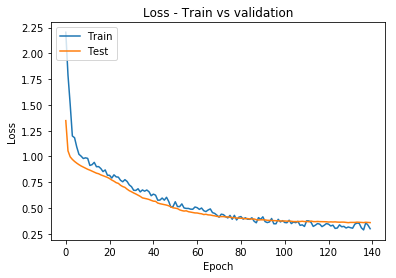

In [69]:
# plot loss - Train vs Valid
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Loss - Train vs validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [70]:
metrics = model.evaluate(train_x, train_y)
print("\n%s: %.2f%%" % (model.metrics_names[0], metrics[0]*100))

  32/1460 [..............................] - ETA: 0s

1216/1460 [=======================>......] - ETA: 0s

1460/1460 [==============================] - 0s 46us/step



loss: 22.95%
